In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import numpy as np

In [53]:
#directory = '../data/Sofia-Eindhoven/'
directory = '../data/multiple_data/'

all_dfs = []

for filename in os.listdir(directory):
    #print(filename)
    df = pd.read_csv(directory + filename)

    df["Price at Date"] = pd.to_datetime(df["Price at Date"], format="%Y/%m/%d")


    if df["Price in EUR"].max() != df["Price in EUR"].min():
        all_dfs.append((filename[:-4], df))

#all_dfs.sort(key=lambda x : int(x[0].split(' ')[0]))
#print(all_dfs)

In [48]:
directory = '../data/Sofia-Eindhoven/'

all_dfs = []

for filename in os.listdir(directory):
    #print(filename)
    df = pd.read_csv(directory + filename)

    df["Price at Date"] = pd.to_datetime(df["Price at Date"], format="%Y/%m/%d")


all_dfs.sort(key=lambda x : int(x[0].split(' ')[0]))
#print(all_dfs)

In [54]:
#have normalized y

for name, cur_dfs in all_dfs:
    cur_dfs["normalized"] = (cur_dfs["Price in EUR"] - cur_dfs["Price in EUR"].min()) / (cur_dfs["Price in EUR"].max() - cur_dfs["Price in EUR"].min())

display(all_dfs[0])


('Rome-Amsterdam-14',
    Price at Date  Price in EUR  normalized
 0     2023-06-08           106    0.340909
 1     2023-06-09           100    0.272727
 2     2023-06-10            96    0.227273
 3     2023-06-11            96    0.227273
 4     2023-06-12            96    0.227273
 ..           ...           ...         ...
 56    2023-08-03           148    0.818182
 57    2023-08-04           156    0.909091
 58    2023-08-05           161    0.965909
 59    2023-08-06           160    0.954545
 60    2023-08-07           164    1.000000
 
 [61 rows x 3 columns])

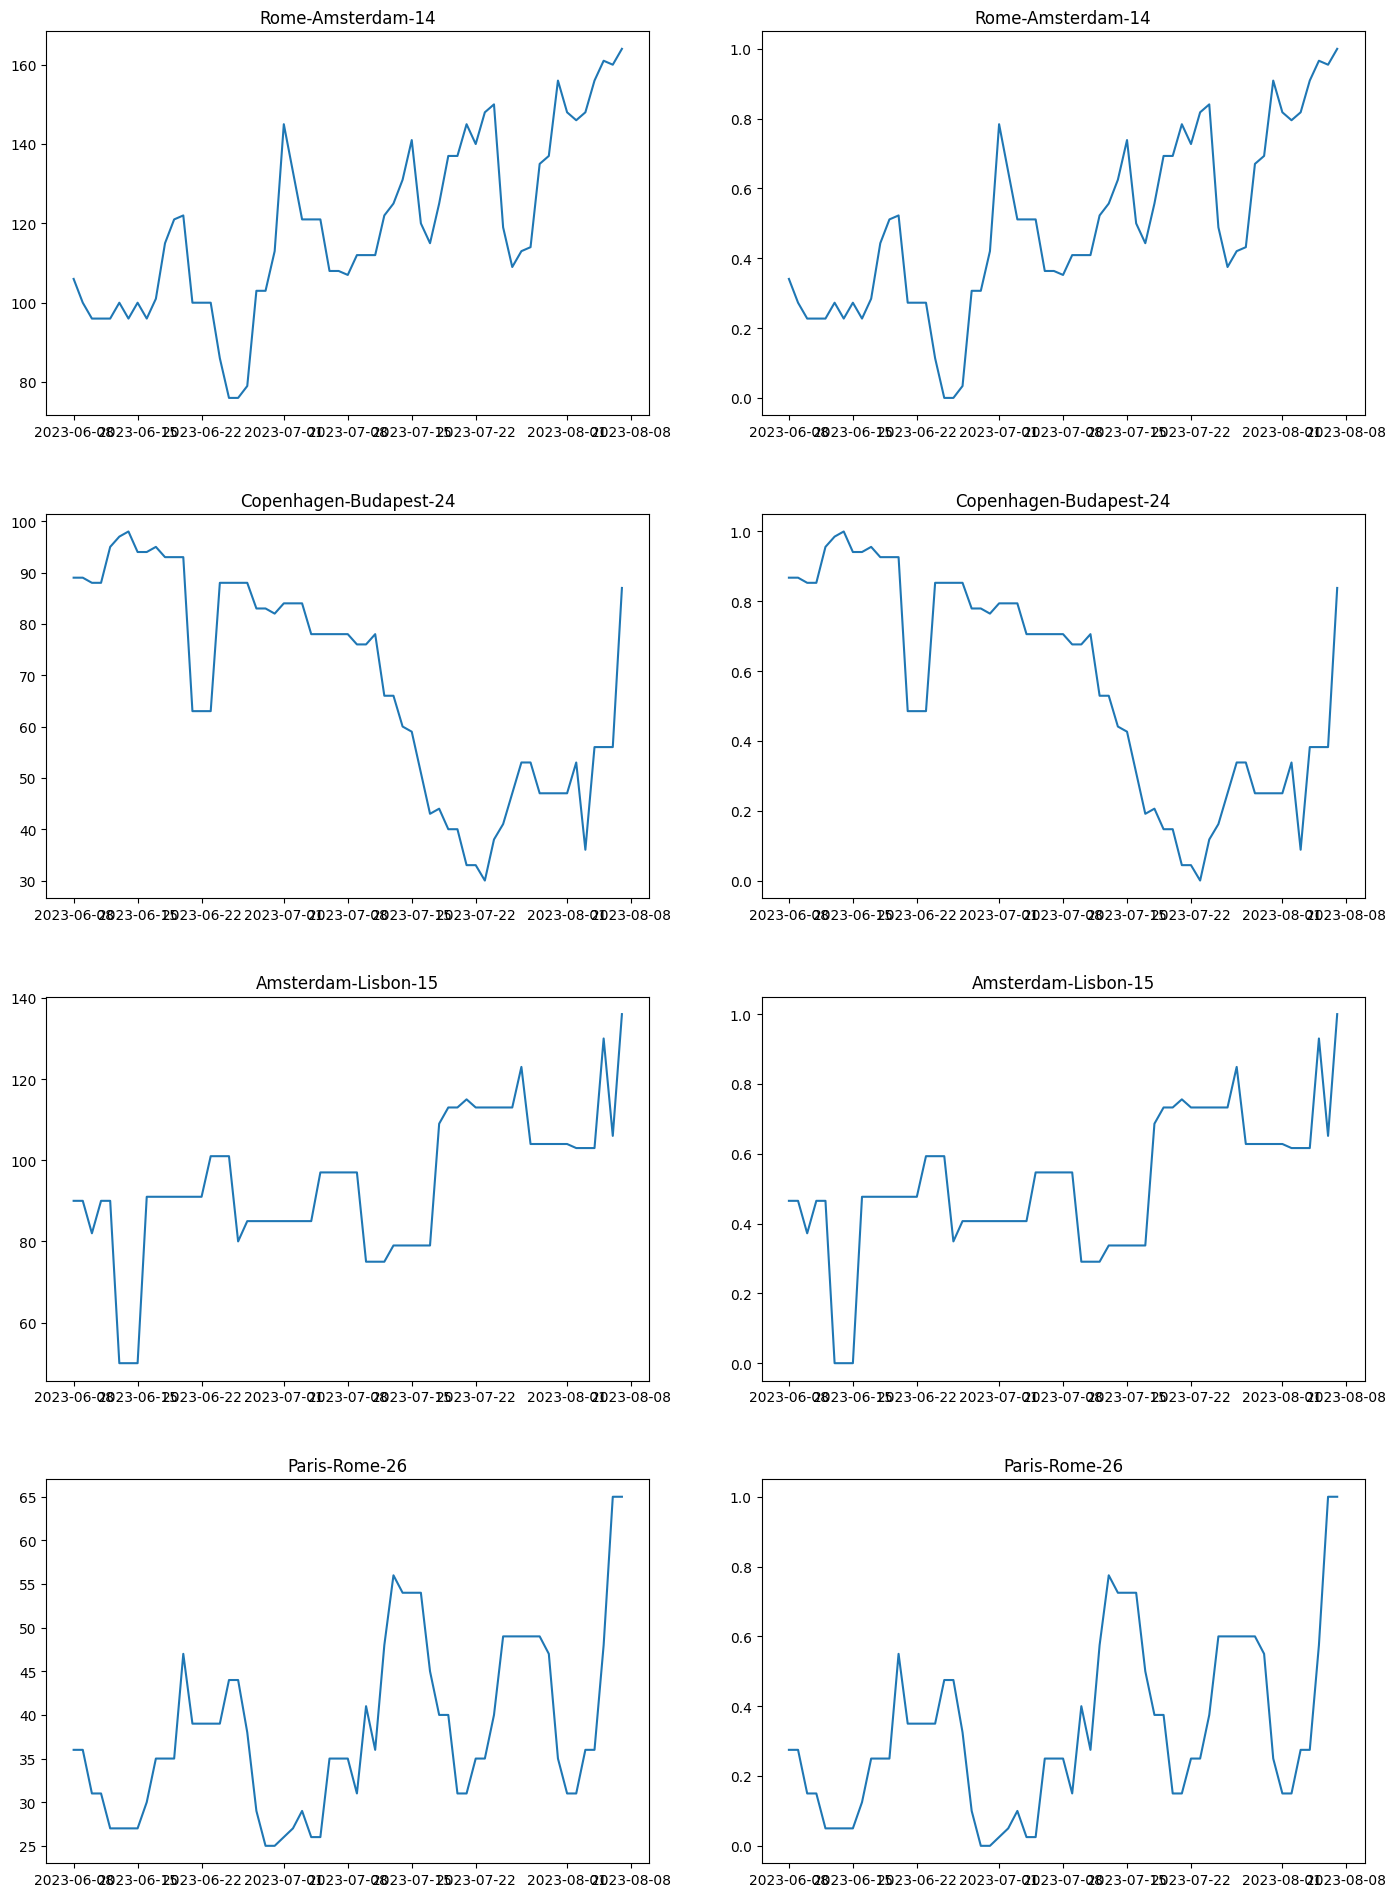

In [5]:
fig, ax = plt.subplots(len(all_dfs[:4]), 2)

fig.set_size_inches((15, 20))
fig.tight_layout(pad=5.0)

for ind, (name, df) in enumerate(all_dfs[:4]):
    ax[ind][0].plot(df["Price at Date"], df["Price in EUR"])
    ax[ind][0].title.set_text(name)

    ax[ind][1].plot(df["Price at Date"], df["normalized"])
    ax[ind][1].title.set_text(name)


In [121]:
#sliding window approach
WINDOW_SIZE_X = 16
WINDOW_SIZE_y = 3

np_frames = [x[1].to_numpy() for x in all_dfs]

df_data = pd.DataFrame({
    "window_X":[[]],
    "window_y":[[]]
})

for cur_frame in np_frames:
    cur_len = len(cur_frame)

    for start_from in range(0, cur_len, WINDOW_SIZE_X + WINDOW_SIZE_y):
        if start_from + WINDOW_SIZE_X + WINDOW_SIZE_y > cur_len:
            break
        df_data.loc[len(df_data)] = [np.array(cur_frame[start_from:start_from + WINDOW_SIZE_X, 2]), np.array(cur_frame[start_from + WINDOW_SIZE_X:start_from+WINDOW_SIZE_X+WINDOW_SIZE_y, 2])]
        #print(cur_frame[start_from:start_from + WINDOW_SIZE_X, 2][0])
df_data = df_data.drop([0])
display(len(df_data))
display(df_data)

6326

,window_X,window_y
1,"[0.3409090909090909, 0.2727272727272727, 0.227...","[0.11363636363636363, 0.0, 0.0]"
2,"[0.03409090909090909, 0.3068181818181818, 0.30...","[0.5568181818181818, 0.625, 0.7386363636363636]"
3,"[0.5, 0.4431818181818182, 0.5568181818181818, ...","[0.8181818181818182, 0.7954545454545454, 0.818..."
4,"[0.8676470588235294, 0.8676470588235294, 0.852...","[0.8529411764705882, 0.8529411764705882, 0.852..."
5,"[0.8529411764705882, 0.7794117647058824, 0.779...","[0.5294117647058824, 0.4411764705882353, 0.426..."
...,...,...
6322,"[0.05825242718446602, 0.05825242718446602, 0.0...","[0.05825242718446602, 0.0, 0.0]"
6323,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0]"
6324,"[0.14184397163120568, 0.14184397163120568, 0.1...","[0.0, 0.07092198581560284, 0.07092198581560284]"
6325,"[0.07092198581560284, 0.07092198581560284, 0.0...","[0.14893617021276595, 0.14893617021276595, 0.1..."


In [122]:
# split data into train and validation
from sklearn.model_selection import train_test_split

#np_data = df_data.to_numpy()

print(df_data["window_X"].isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(df_data["window_X"].to_numpy(), df_data["window_y"].to_numpy(), test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

0
(5693,)
(633,)
(5693,)
(633,)


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regr = RandomForestRegressor(max_depth=6, random_state=0)

X_train = [z for z in X_train]
y_train = [z for z in y_train]
regr.fit(X_train, y_train)

X_test = [z for z in X_test]
y_test = [z for z in y_test]

mean_squared_error(y_test, regr.predict(X_test))

0.03928894056029301

In [35]:
print(X_train[:3])

train_ex = tf.data.Dataset.from_tensor_slices(([X_train[0], X_train[1]], [y_train[0], y_train[1]]))

[array([0.7407407407407407, 0.9012345679012346, 1.0, 0.6666666666666666,
       0.7654320987654321, 0.3950617283950617, 0.2222222222222222,
       0.09876543209876543, 0.14814814814814814, 0.8148148148148148,
       0.6172839506172839, 0.5185185185185185, 0.4691358024691358,
       0.345679012345679, 0.345679012345679, 0.35802469135802467,
       0.19753086419753085, 0.4567901234567901, 0.4074074074074074,
       0.3950617283950617, 0.4444444444444444, 0.4444444444444444,
       0.6049382716049383, 0.654320987654321, 0.6790123456790124,
       0.6419753086419753, 0.6419753086419753, 0.6419753086419753,
       0.6666666666666666, 0.6790123456790124], dtype=object), array([0.6976744186046512, 0.6976744186046512, 0.6976744186046512,
       0.6976744186046512, 0.5348837209302325, 0.4418604651162791,
       0.3488372093023256, 0.3488372093023256, 0.3488372093023256,
       0.3488372093023256, 0.3488372093023256, 0.3488372093023256,
       0.3488372093023256, 0.4186046511627907, 0.1162790697

TypeError: Cannot convert [array([0.7407407407407407, 0.9012345679012346, 1.0, 0.6666666666666666,
       0.7654320987654321, 0.3950617283950617, 0.2222222222222222,
       0.09876543209876543, 0.14814814814814814, 0.8148148148148148,
       0.6172839506172839, 0.5185185185185185, 0.4691358024691358,
       0.345679012345679, 0.345679012345679, 0.35802469135802467,
       0.19753086419753085, 0.4567901234567901, 0.4074074074074074,
       0.3950617283950617, 0.4444444444444444, 0.4444444444444444,
       0.6049382716049383, 0.654320987654321, 0.6790123456790124,
       0.6419753086419753, 0.6419753086419753, 0.6419753086419753,
       0.6666666666666666, 0.6790123456790124], dtype=object), array([0.6976744186046512, 0.6976744186046512, 0.6976744186046512,
       0.6976744186046512, 0.5348837209302325, 0.4418604651162791,
       0.3488372093023256, 0.3488372093023256, 0.3488372093023256,
       0.3488372093023256, 0.3488372093023256, 0.3488372093023256,
       0.3488372093023256, 0.4186046511627907, 0.11627906976744186,
       0.11627906976744186, 0.23255813953488372, 0.23255813953488372,
       0.23255813953488372, 0.023255813953488372, 0.0, 0.0,
       0.11627906976744186, 0.4418604651162791, 0.3488372093023256,
       0.46511627906976744, 0.2558139534883721, 0.23255813953488372,
       0.11627906976744186, 0.046511627906976744], dtype=object)] to EagerTensor of dtype string

In [143]:
import tensorflow as tf
from tensorflow import keras

EPOCHS = 20
BATCH_SIZE = 5

def build_model():
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(50, input_shape=(WINDOW_SIZE_X,),name='dense_layer', activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

    model.add(keras.layers.Dense(60,name='dense_layer_2', activation='sigmoid'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10,name='dense_layer_3', activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
    model.add(keras.layers.Dropout(0.1))
    
    model.add(keras.layers.Dense(WINDOW_SIZE_y,name='output_layer', activation='linear'))
    return model

model = build_model()

model.summary()
model.compile(optimizer = "adam", loss = "mean_squared_error",
    metrics = ["mean_squared_error"]
)

X_train_2 = [list(z) for z in X_train[:]]
y_train_2 = [list(z) for z in y_train[:]]

X_test_2 = [list(z) for z in X_test[:]]
y_test_2 = [list(z) for z in y_test[:]]

history = model.fit(X_train_2, y_train_2, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_2, y_test_2))

score = model.evaluate(X_test_2, y_test_2, batch_size=BATCH_SIZE)

print("\nTest score:", score[0])
print('Test accuracy:', score[1])

print(history)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 50)                850       
                                                                 
 dense_layer_2 (Dense)       (None, 60)                3060      
                                                                 
 dropout_34 (Dropout)        (None, 60)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                610       
                                                                 
 dropout_35 (Dropout)        (None, 10)                0         
                                                                 
 output_layer (Dense)        (None, 3)                 33        
                                                                 
Total params: 4553 (17.79 KB)
Trainable params: 4553 

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


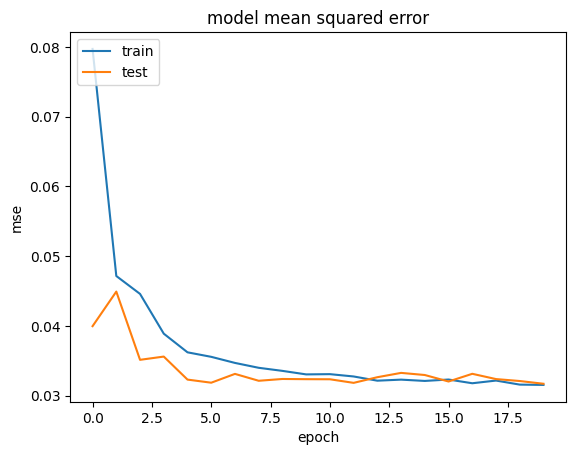

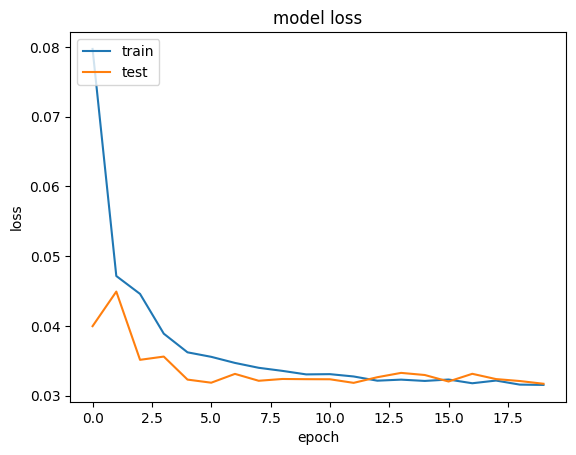

In [144]:
print(history.history.keys())

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 18ms/step


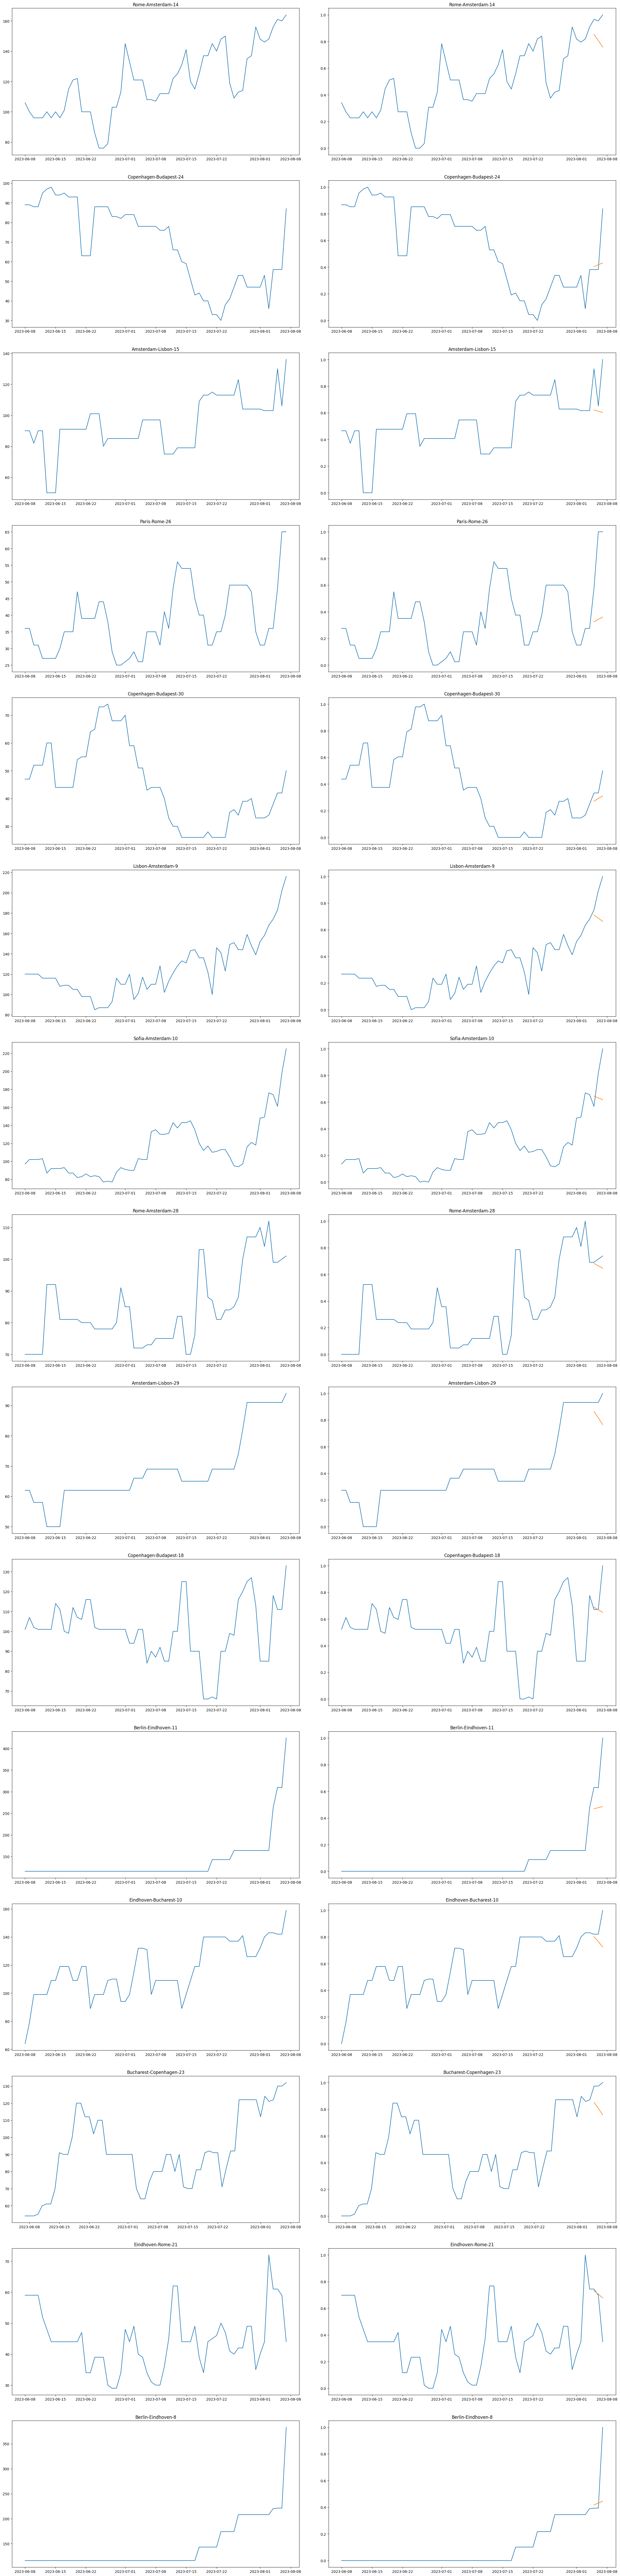

In [145]:
# use regressor to continue function

TO_DISPLAY = 15

fig, ax = plt.subplots(TO_DISPLAY, 2)

fig.set_size_inches((25, 100))
fig.tight_layout(pad=5.0)

for ind, (name, df) in enumerate(all_dfs[:TO_DISPLAY]):
    ax[ind][0].plot(df["Price at Date"], df["Price in EUR"])
    ax[ind][0].title.set_text(name)

    ax[ind][1].plot(df["Price at Date"], df["normalized"])

    if WINDOW_SIZE_X + WINDOW_SIZE_y < len(df):
        

        cur_pred = df["normalized"].to_numpy()[-(WINDOW_SIZE_X+WINDOW_SIZE_y):-WINDOW_SIZE_y]
        predicted_values = model.predict([list(cur_pred)])
        
        
        ax[ind][1].plot(df["Price at Date"][-(WINDOW_SIZE_y):], predicted_values.reshape(-1, 1))
    ax[ind][1].title.set_text(name)